#Giorgio Mendoza
#CS539-F23-F02
#Dr. J. Sethi
#Lab: Week 7: SciKit




# LAB 2-1: Exploratory Data Analysis


## Overview

Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis.

# Shark Tank Introduction

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file https://raw.githubusercontent.com/dlsun/data-science-book/master/data/sharktank.csv. Read in the data into a Pandas `DataFrame`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
#load the dataset
data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sharktank.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
#drive.mount('/content/drive')
data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sharktank.csv')
#print(data_frame.columns)
shark_columns = ['Corcoran', 'Cuban', 'Greiner', 'Herjavec', 'John', 'O\'Leary']

#fill missing values (NaNs) in shark columns with zeros
data_frame[shark_columns] = data_frame[shark_columns].fillna(0)

Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

he 'Amount' and 'Equity' columns are being treated as categorical variables (dtype: object) because their values likely contain non-numeric characters such as currency symbols (e.g., "$") or percentage signs (e.g., "%"). First, we have to clean up the columns and cast them to number types.

In [27]:
#clean up 'Amount' column and convert it to a numeric type (float)

data_frame['Amount'] = data_frame['Amount'].str.replace('[\$,]', '', regex=True).astype(float)

#clean up 'Equity' column and convert it to a numeric type (float)
data_frame['Equity'] = data_frame['Equity'].str.replace('%', '', regex=True).astype(float)

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [20]:
#get valuation for each funded company, handle cases where equity is zero
data_frame['Valuation'] = data_frame['Amount'] / (data_frame['Equity'].replace({0: 1e-10}) / 100)

#get most valuable company
most_valuable_company = data_frame[data_frame['Valuation'] == data_frame['Valuation'].max()]

#find company that received largest total investment from sharks
largest_investment_company = data_frame[data_frame['Amount'] == data_frame['Amount'].max()]

#display most valuable company and largest investment company
print("Most Valuable Company:")
print(most_valuable_company[['Company', 'Valuation']])

print("\nCompany with Largest Total Investment:")
print(largest_investment_company[['Company', 'Amount']])

Most Valuable Company:
              Company     Valuation
312  The Wall DoctoRX  1.500000e+17

Company with Largest Total Investment:
    Company     Amount
483  AirCar  5000000.0


The company The Wall Doctor has the highest valuation with 1.5e+17.
However, the company that received the largest investment was AirCar with $5,000,000 from the sharks.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons? Avoid loops.

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [48]:
import pandas as pd

data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sharktank.csv')

#clean up 'Amount' column and convert it to a numeric type (float)
data_frame['Amount'] = data_frame['Amount'].str.replace('[\$,]', '', regex=True).astype(float)

#make columns that represents sharks
shark_columns = ['Corcoran', 'Cuban', 'Greiner', 'Herjavec', 'John', "O'Leary"]

#get total investment for each shark
data_frame['TotalInvestment'] = data_frame[shark_columns].sum(axis=1)

#get shark who invested most total money
most_invested_shark = data_frame[shark_columns].sum().idxmax()

print("Shark Who Invested the Most Total Money:")
print(most_invested_shark)


Shark Who Invested the Most Total Money:
Cuban


According to the code above, the shark that invested the most was Mark Cuban.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

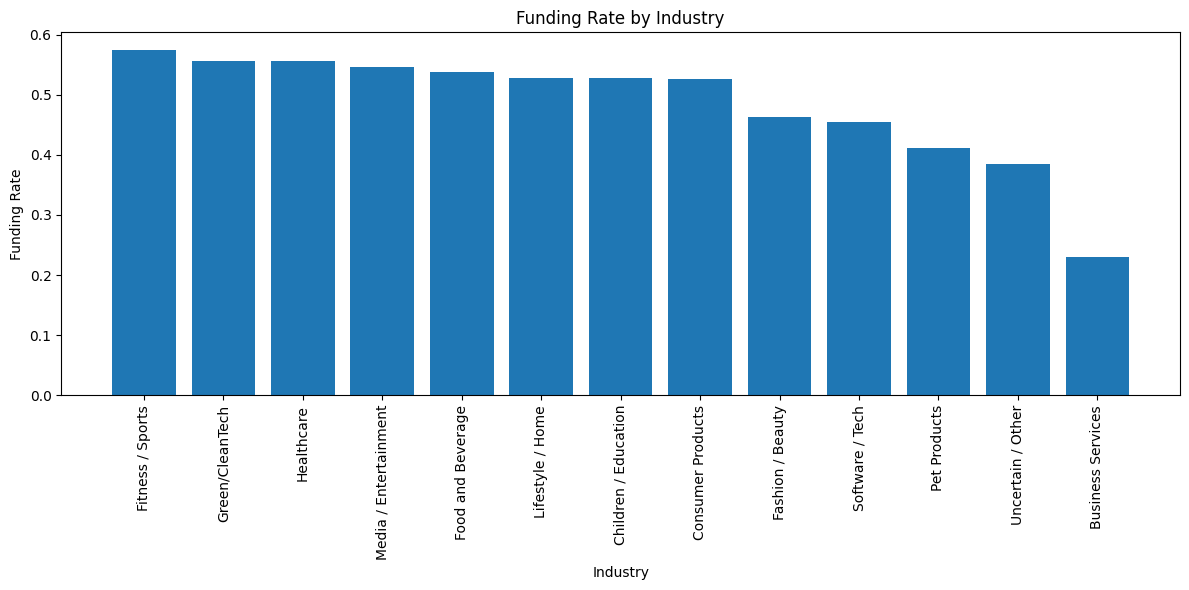

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sharktank.csv')

#calculating funding rate for each industry
industry_funding_rate = data_frame.groupby('Industry')['Deal'].apply(lambda x: (x == 'Yes').sum() / x.count()).reset_index()
industry_funding_rate.columns = ['Industry', 'FundingRate']

#sorting industries by funding rate
industry_funding_rate = industry_funding_rate.sort_values(by='FundingRate', ascending=False)

#bar plot to visualize the funding rate
plt.figure(figsize=(12, 6))
plt.bar(industry_funding_rate['Industry'], industry_funding_rate['FundingRate'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Funding Rate')
plt.title('Funding Rate by Industry')
plt.tight_layout()
plt.show()

As the plot shows above, the sharks prefer more the fitness/sports industries. There are about 6 other industries that have similar funding rate. The industry less prefered is the business service.


## Responses

Please enter your responses in this notebook itself by creating new text or code cells, as needed.

# Submission Instructions

Once you have filled out the Colab notebook completely, you are ready to submit. Your final submission will consist of the `.ipynb` and the `.pdf` files, as described below:

1. Download the Google Colab notebook as an iPython notebook
   * You can do this by going to *File \> Download .ipynb*
2. Print out a PDF of your Colab notebook.
   * In Google Chrome, you can do this by going to *File \> Print* and then choosing *Save to PDF*.
   * **Make sure you have run all cells first.**
   * Ensure you've closed the table of contents sidebar before you print so we can easily see your work and output.
3. Submit **both** the `.ipynb` notebook and the `.pdf` files via Blackboard or directly via the cloud using the Google Integration with Blackboard (if applicable).

---